# Análisis de Datos y Modelos de Regresión - data_exam1.xlsx


### 1. Análisis Exploratorio de Datos (EDA)

**Pregunta:**
¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique.

**Proceso:**  
1. Se realiza un análisis descriptivo de las variables involucradas.
2. Se evalúan las correlaciones entre variables para determinar si es justificable un modelo de regresión lineal.
3. Se observa la relación gráfica entre las variables.
    

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar el archivo Excel
file_path = './Datos/data_exam1.xlsx'
df_data1 = pd.read_excel(file_path, sheet_name='data1')

# Análisis descriptivo
desc = df_data1.describe()
desc


,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [5]:

# Matriz de correlación
corr_matrix = df_data1.corr()
corr_matrix


,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


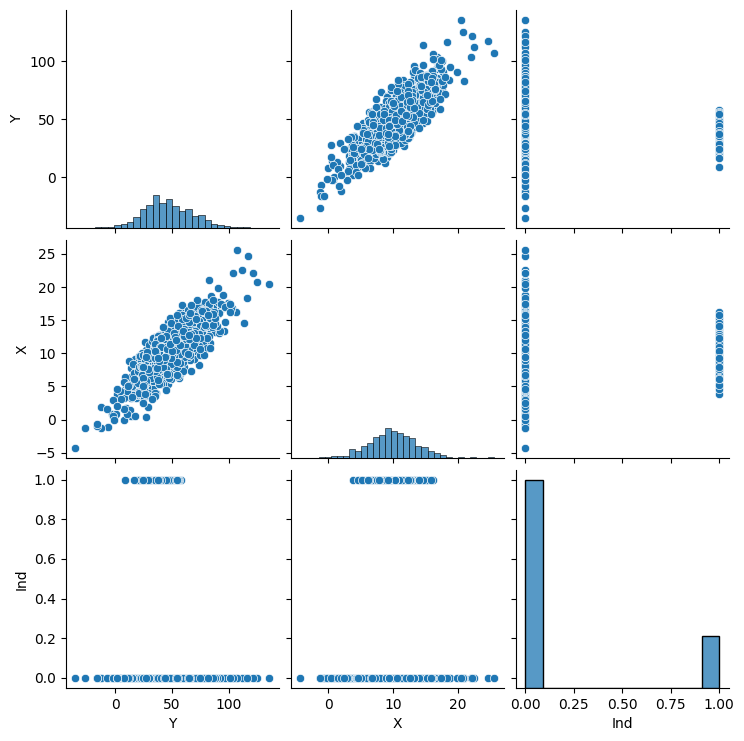

In [6]:

# Gráfico de distribuciones emparejadas
sns.pairplot(df_data1)
plt.show()



### Conclusión:
Dado que existe una correlación significativa entre X e Y, podemos justificar un modelo de regresión lineal.
    


### 2. Gráfico de Dispersión y Modelo con Interacción

**Pregunta:**
Realice un gráfico de dispersión para Y vs X y considere la variable Ind. ¿Considera que un modelo con interacciones sería más adecuado?

**Proceso:**  
1. Se realiza un gráfico de dispersión de Y vs X categorizado por Ind.
2. Se ajustan modelos de regresión sin y con interacción.
    

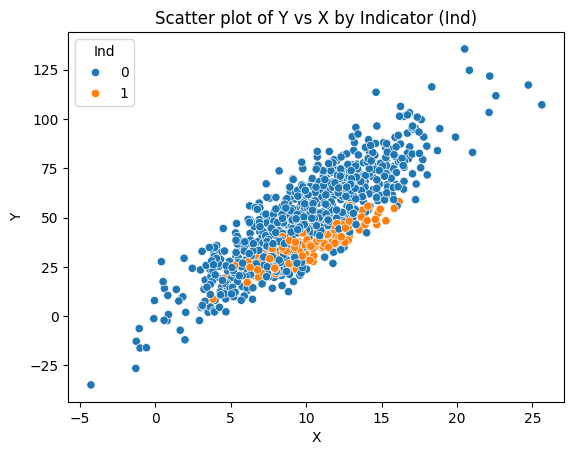

In [7]:

# Gráfico de dispersión
sns.scatterplot(x='X', y='Y', hue='Ind', data=df_data1)
plt.title('Scatter plot of Y vs X by Indicator (Ind)')
plt.show()


In [8]:

# Modelo sin interacción
model_no_interaction = ols('Y ~ X + Ind', data=df_data1).fit()
model_no_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        04:38:15   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:

# Modelo con interacción
model_with_interaction = ols('Y ~ X * Ind', data=df_data1).fit()
model_with_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        04:38:28   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4991      1.001     -0.498      0.618      -2.464       1.466
X              5.0411      0.093     53.997      0.000       4.858       5.224
Ind            4.5491      3.674      1.238      0.216      -2.661      11.759
X:Ind         -1.8466      0.353     -5.239      0.000      -2.538      -1.155
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.811
Skew:                           0.065   Prob(JB):                       0.0902
Kurtosis:                       3.314   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### Conclusión:
El modelo con interacción puede ser más adecuado si el gráfico de dispersión muestra una diferencia en el efecto de X sobre Y según el valor de Ind.
    


### 3. Validación de los Supuestos del Modelo

**Pregunta:**
Valide los supuestos del modelo de regresión.

**Proceso:**  
1. Se generan gráficos de residuos vs valores ajustados y gráficos Q-Q.
2. Se realiza una prueba de heterocedasticidad.
    

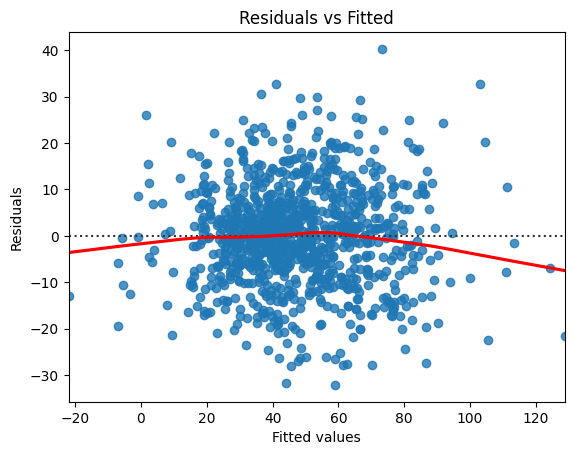

In [11]:

# Residuos vs valores ajustados
residuals = model_with_interaction.resid
fitted = model_with_interaction.fittedvalues

sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


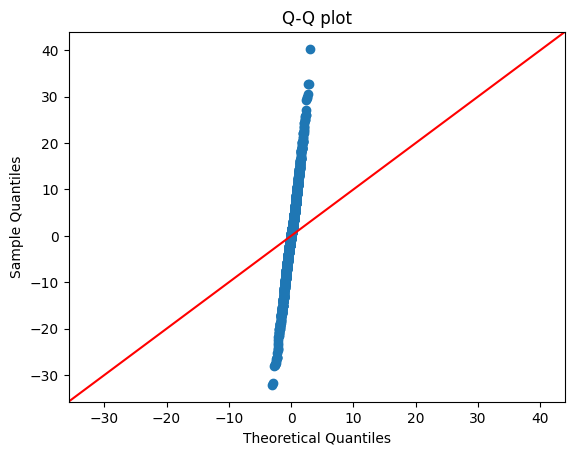

In [12]:

# Gráfico Q-Q
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot')
plt.show()


In [13]:

# Prueba de heterocedasticidad
test_het = sm.stats.diagnostic.het_breuschpagan(residuals, model_with_interaction.model.exog)
test_het


(83.04028836791721,
 6.835236597869036e-18,
 30.06607093901456,
 1.3067597184142322e-18)


### Conclusión:
Si los residuos muestran homocedasticidad y normalidad, podemos validar el modelo propuesto.
    